In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter
from scipy import interpolate
import random
np.set_printoptions(threshold=np.inf)

In [2]:
dir = '/home/wamdm/competition_data/AstroSet-v0.1/AstroSet/044_16280425-G0013'
dirlist = os.listdir(dir)  # 返回指定的文件夹包含的文件或文件夹的名字的列表。
if "abstract" in dirlist:
    dirlist.remove('abstract')
difflist = []
removlist = []
for file in dirlist:
    filepath = os.path.join(dir, file) 
    data = np.loadtxt(filepath ,dtype=float,delimiter = ' ')
    if np.all(data[:,1]< 4.5):
        removlist.append(file)
print(removlist)        
print(len(dirlist))
print(len(removlist))
new_dirlist = [item for item in dirlist if item not in removlist]
print(len(new_dirlist))

['ref_044_16280425-G0013_362178_17651', 'ref_044_16280425-G0013_337208_7773', 'ref_044_16280425-G0013_364961_11099', 'ref_044_16280425-G0013_340735_7018', 'ref_044_16280425-G0013_343813_4470', 'ref_044_16280425-G0013_340362_4765', 'ref_044_16280425-G0013_341720_3110', 'ref_044_16280425-G0013_338934_16726', 'ref_044_16280425-G0013_337709_9607', 'ref_044_16280425-G0013_337831_10441', 'ref_044_16280425-G0013_343485_3825', 'ref_044_16280425-G0013_339140_12795', 'ref_044_16280425-G0013_338858_19463', 'ref_044_16280425-G0013_331771_5921', 'ref_044_16280425-G0013_342096_7446', 'ref_044_16280425-G0013_361706_17121', 'ref_044_16280425-G0013_363798_16769', 'ref_044_16280425-G0013_342368_6436', 'ref_044_16280425-G0013_362081_17459', 'ref_044_16280425-G0013_339945_12951', 'ref_044_16280425-G0013_343064_4875', 'ref_044_16280425-G0013_342482_6422', 'ref_044_16280425-G0013_342763_11119', 'ref_044_16280425-G0013_344003_4726', 'ref_044_16280425-G0013_365079_12995', 'ref_044_16280425-G0013_337684_8518',

#### 对每颗星计算差分，都append到一个list里——difflist中，使用0.25625作为一个初始的截断条件，将截断后的所有子序列保存在cut中

In [3]:
difflist = []
cut = []
cut_index = []
for index,file in enumerate(new_dirlist):
    filepath = os.path.join(dir, file) 
    data = np.loadtxt(filepath ,dtype=float,delimiter = ' ')
    jdlist = data[:,0]
    diff = [jdlist[i+1]-jdlist[i] for i in range(len(jdlist)-1) ]
    difflist.extend(diff)
    s = 0
    for i, element in enumerate(diff):
        if element >0.25625:
            e = i
#             print(s,e)
            if e-s > 24:
                cut.append(data[s:e])
                cut_index.append(index)
            s = e+1
        if i == (len(diff)-1):
            e = i
#             print(s,e)
            if e-s > 24:        
                cut.append(data[s:e])
                cut_index.append(index)

#### 生成字典diff_num_dict，用于计算每一个key所对应的差分个数，其中key为保留6位数字后的差分
#### 生成diff_num_per_array，用于保存每一个key所对应的比例，将其保存到文件中

In [4]:
# 计算各种差分的个数，形成字典
difflist6 = [float('{:.6f}'.format(i)) for i in difflist]
difflist6.sort()
diff_num_dict = {}
for key in difflist6:
    diff_num_dict[key] = diff_num_dict.get(key, 0) + 1
print(len(diff_num_dict))

# 计算比例
lenth_difflist = len(difflist)
print(lenth_difflist)
diff_num_per_array = np.array([[1,2,3],[1,2,3]],dtype='float32')
for (k,v) in diff_num_dict.items():
    print("diff_num_dict[%s]=" % k,v,v/lenth_difflist)
    arr = np.array([k,v,v/lenth_difflist])
    diff_num_per_array = np.vstack((diff_num_per_array,arr))

diff_num_per_array = np.delete(diff_num_per_array,0,axis=0)   # 删除第一行
# np.savetxt('../dataset/044_16280425-G0013_diff_num_per_array.csv',diff_num_per_array,fmt="%s",delimiter=",") 

3221
40500182
diff_num_dict[0.000173]= 3529478 0.08714721331375745
diff_num_dict[0.000174]= 33891643 0.8368269308024344
diff_num_dict[0.000175]= 555159 0.01370756803018811
diff_num_dict[0.000227]= 10393 0.00025661613076207905
diff_num_dict[0.000266]= 9951 0.0002457025995586884
diff_num_dict[0.000272]= 6017 0.0001485672335990984
diff_num_dict[0.000274]= 9159 0.00022614713188202462
diff_num_dict[0.000347]= 1297445 0.03203553505018817
diff_num_dict[0.000348]= 26708 0.0006594538266519394
diff_num_dict[0.000349]= 10511 0.0002595296979159254
diff_num_dict[0.000401]= 117 2.8888759067798756e-06
diff_num_dict[0.00044]= 291 7.185152896349947e-06
diff_num_dict[0.000446]= 249 6.1481205195571716e-06
diff_num_dict[0.000447]= 311 7.678977837679841e-06
diff_num_dict[0.00052]= 41262 0.0010188102364577028
diff_num_dict[0.000521]= 377866 0.009329982764028072
diff_num_dict[0.000522]= 19094 0.0004714546714876491
diff_num_dict[0.000574]= 32 7.901199061278293e-07
diff_num_dict[0.000613]= 100 2.46912470664946

diff_num_dict[0.01111]= 9 2.2222122359845197e-07
diff_num_dict[0.011111]= 103 2.5431984478489502e-06
diff_num_dict[0.011112]= 10 2.4691247066494664e-07
diff_num_dict[0.011283]= 2 4.938249413298933e-08
diff_num_dict[0.011284]= 5 1.2345623533247332e-07
diff_num_dict[0.011285]= 103 2.5431984478489502e-06
diff_num_dict[0.011286]= 1 2.4691247066494666e-08
diff_num_dict[0.011296]= 1 2.4691247066494666e-08
diff_num_dict[0.011457]= 5 1.2345623533247332e-07
diff_num_dict[0.011458]= 96 2.370359718383488e-06
diff_num_dict[0.011459]= 5 1.2345623533247332e-07
diff_num_dict[0.011532]= 1 2.4691247066494666e-08
diff_num_dict[0.011631]= 2 4.938249413298933e-08
diff_num_dict[0.011632]= 99 2.444433459582972e-06
diff_num_dict[0.011805]= 29 7.160461649283452e-07
diff_num_dict[0.011806]= 61 1.5061660710561745e-06
diff_num_dict[0.011817]= 1 2.4691247066494666e-08
diff_num_dict[0.011979]= 91 2.2469034830510143e-06
diff_num_dict[0.011991]= 1 2.4691247066494666e-08
diff_num_dict[0.012153]= 105 2.592580941981939

diff_num_dict[0.815463]= 3 7.4073741199484e-08
diff_num_dict[0.815637]= 1 2.4691247066494666e-08
diff_num_dict[0.815983]= 1 2.4691247066494666e-08
diff_num_dict[0.815984]= 2 4.938249413298933e-08
diff_num_dict[0.816157]= 2 4.938249413298933e-08
diff_num_dict[0.816331]= 2 4.938249413298933e-08
diff_num_dict[0.816505]= 4 9.876498826597866e-08
diff_num_dict[0.816678]= 2 4.938249413298933e-08
diff_num_dict[0.817026]= 2 4.938249413298933e-08
diff_num_dict[0.817199]= 1 2.4691247066494666e-08
diff_num_dict[0.817373]= 4 9.876498826597866e-08
diff_num_dict[0.817548]= 1 2.4691247066494666e-08
diff_num_dict[0.817893]= 1 2.4691247066494666e-08
diff_num_dict[0.818067]= 1 2.4691247066494666e-08
diff_num_dict[0.818241]= 1 2.4691247066494666e-08
diff_num_dict[0.818414]= 2 4.938249413298933e-08
diff_num_dict[0.818762]= 2 4.938249413298933e-08
diff_num_dict[0.819109]= 3 7.4073741199484e-08
diff_num_dict[0.819282]= 1 2.4691247066494666e-08
diff_num_dict[0.81963]= 1 2.4691247066494666e-08
diff_num_dict[0.

diff_num_dict[2.869085]= 1 2.4691247066494666e-08
diff_num_dict[2.869086]= 1 2.4691247066494666e-08
diff_num_dict[2.869259]= 2 4.938249413298933e-08
diff_num_dict[2.869779]= 2 4.938249413298933e-08
diff_num_dict[2.86978]= 1 2.4691247066494666e-08
diff_num_dict[2.869781]= 1 2.4691247066494666e-08
diff_num_dict[2.870127]= 2 4.938249413298933e-08
diff_num_dict[2.870128]= 2 4.938249413298933e-08
diff_num_dict[2.870301]= 2 4.938249413298933e-08
diff_num_dict[2.870474]= 1 2.4691247066494666e-08
diff_num_dict[2.870648]= 1 2.4691247066494666e-08
diff_num_dict[2.870822]= 2 4.938249413298933e-08
diff_num_dict[2.871169]= 1 2.4691247066494666e-08
diff_num_dict[2.871342]= 1 2.4691247066494666e-08
diff_num_dict[2.871516]= 2 4.938249413298933e-08
diff_num_dict[2.871689]= 1 2.4691247066494666e-08
diff_num_dict[2.87169]= 1 2.4691247066494666e-08
diff_num_dict[2.872732]= 1 2.4691247066494666e-08
diff_num_dict[2.873079]= 1 2.4691247066494666e-08
diff_num_dict[2.873599]= 1 2.4691247066494666e-08
diff_num_

In [5]:
#### 计算密度，保存在density中
#### 根据理论上15秒一个点计算每一条截断后的子序列的密度，但有可能实际上比15秒要短一些或者长一些，所以密度有稍微超过1的
import math
density = []
for i,s in enumerate(cut):
    if len(s) > 1:
        d = len(s[:,0])/((s[-1,0]-s[0,0])*86400/15)
        density.append(d)
    else:
        density.append(0)
print(density)

[0.9967625156291166, 1.0102911693525, 1.002494562942846, 0.9935667952961154, 0.9734039244851511, 0.9980744229749245, 0.9931666496165413, 0.9999932678575489, 1.0051043289690014, 0.9155847970646055, 0.9657195001163603, 0.9150005821961888, 0.975540503385727, 0.397792581852968, 0.921233078298883, 0.8731454650861066, 0.990290031761395, 1.0102911693525, 0.9950132602343172, 0.9935667952961154, 0.359998154649657, 0.7179990483431495, 0.9885846912104495, 0.9823409259448327, 0.7799343060604451, 1.0102911693525, 1.0000007953733363, 0.9670225080705742, 0.8440372044869999, 0.9471591997574578, 0.9760550170904696, 0.5769046221166918, 0.9611638543566481, 1.0102911693525, 0.9426441412746163, 0.9882524204321675, 0.45043322049121454, 0.9749147659022798, 0.9441060994859021, 0.9967625156291166, 1.0102911693525, 1.002494562942846, 0.9935667952961154, 0.9689437212904484, 0.9980744229749245, 0.9931666496165413, 0.9999932678575489, 0.8367365987356153, 0.9805813059598127, 1.0102911693525, 0.9925194926648077, 0.9

In [6]:
# 密度大于25%
lenlist = []
cut_len_den= []
cut_len_den_index = []
density_new = []
for i,d in enumerate(density):
    if d >= 0.25:
        cut_len_den.append(cut[i])
        lenlist.append(len(cut[i]))
        cut_len_den_index.append(cut_index[i])
        density_new.append(density[i])
print(min(lenlist))

25


In [7]:
# 滤波
smoth = []
for i,item in enumerate(cut_len_den): 
    sgscale = savgol_filter(item[:,1], 21, 2, mode= 'nearest')
    smoth.append(sgscale)

In [8]:
# 长度不足188的插值，足的不变
cut_smoth_inter = []
for i,item in enumerate(cut_len_den):
    jd = item[:,0]
    x = np.linspace(0,len(jd),len(jd))
    y = smoth[i]
    f = interpolate.interp1d(x,y,kind='cubic')
    if len(jd)<188:
        xnew = np.linspace(0,len(jd),188)
        ynew=f(xnew)
        cut_smoth_inter.append(ynew)
    else:
        xnew = x
        ynew = y
        cut_smoth_inter.append(ynew)

In [9]:
# 滑动窗口，输出临近的两个子序列之间的欧氏距离
win = 188
step = win//6

equalseries = []
equalseries_index = []
# 一个片段
for i in range(0,len(cut_smoth_inter)):
#     print(i)
    distancelist = []
    sildwindow = []
#     滑动，记录各段以及各段与上段的距离
    for j in range(0,len(cut_smoth_inter[i])-win+1,step):
        sildwindow.append(cut_smoth_inter[i][j:j+win])
        if len(sildwindow)>1:
            distance = np.sqrt(np.sum(np.square(sildwindow[-1]- sildwindow[-2])))
            distancelist.append(distance)
#     print(len(sildwindow))
#     print(len(distancelist))
    rank = np.argsort(distancelist)  
#     print(len(sildwindow))
    equalseries.append(sildwindow[0])
    equalseries_index.append(cut_len_den_index[i])
#     只留下最有代表性的前1/4片段，通过相互之间的距离判断是否具有代表性
    for s in range(1,len(sildwindow)):
        if (s-1) in rank[-math.ceil(len(rank)/4):len(rank)+1]:
            equalseries.append(sildwindow[s]) 
            equalseries_index.append(cut_len_den_index[i])

In [10]:
print("原始星的个数",len(new_dirlist))
print("将差分的结果保留6为小数后形成字典，字典的长度代表有多少种不同的差分值",len(diff_num_dict))
print("间断短于369分钟，并长度大于6分钟的子序列数",len(cut))
print("计算密度的子序列的个数，主要用于查看是否与上面的一致",len(density))
print("保留密度大于0.25的子序列个数",len(cut_len_den))
print("进过以上操作以后最短的序列长度",min(lenlist))
print("平滑以后的子序列个数，主要用于检查是否遗漏",len(smoth))
print("插值以后的序列个数，主要用于检查是否遗漏",len(cut_smoth_inter))
print("滑动窗口188，步长188//6，并进一步取top1/4的距离筛选后的子序列个数",len(equalseries))

原始星的个数 11499
将差分的结果保留6为小数后形成字典，字典的长度代表有多少种不同的差分值 3221
间断短于369分钟，并长度大于6分钟的子序列数 91643
计算密度的子序列的个数，主要用于查看是否与上面的一致 91643
保留密度大于0.25的子序列个数 88422
进过以上操作以后最短的序列长度 25
平滑以后的子序列个数，主要用于检查是否遗漏 88422
插值以后的序列个数，主要用于检查是否遗漏 88422
滑动窗口188，步长188//6，并进一步取top1/4的距离筛选后的子序列个数 305059


In [11]:
np.savetxt('../dataset/044_16280425-G0013_equalseries_index.csv',equalseries_index,fmt="%.4f",delimiter=",")  

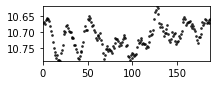

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 50  #视图窗口 每英寸点数，与figsize=(3,1)中的1对应
## 多生成一些模板（图片性质的多样性）
def gen_img_rand_samples(template,name):
    width=len(template)
    fig,ax=plt.subplots(figsize=(3,1))
    #alpha 透明度 S数据点大小
    ax.scatter(np.arange(width),template,color='black',alpha=0.7,s=3)
    ax.invert_yaxis()
#     ax.axis('off')
    ax.margins(0, 0)
#     fig.savefig(path + name + '.png')

# flare = np.loadtxt("../dataset/flare28_scale_dataset_label.csv" ,dtype=float,delimiter = ',')
# path = '../dataset/test/flare28/'
gen_img_rand_samples(equalseries[2725].astype('float64'),str(i))

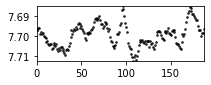

In [26]:
gen_img_rand_samples(equalseries[0].astype('float64'),str(i))

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


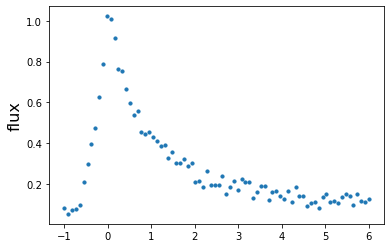

In [12]:
# 定义耀发模板

def function(x, x1): # x1是分段点位置
    if x <= x1:
        return  1 + random.uniform(1.933,1.949)*x - random.uniform(0.143,0.207)*x**2 - random.uniform(2.207,2.285)*x**3 - random.uniform(1.109,1.141)*x**4+random.uniform(0,0.1)
    else:
        return  random.uniform(0.6882,0.6898) * np.exp(-random.uniform(1.597,1.603) * x)+ random.uniform(0.3021,0.3039)* np.exp(-random.uniform(0.2776,0.2790) * x)+random.uniform(0,0.1)

# random.uniform(0.5,3)
x = np.linspace(-1,6, 80)                #从-1到5，共50个点
y = np.array([function(t, 0) for t in x]) #根据x计算各点函数值

plt.scatter(x,y,s=10)
plt.ylabel('flux',fontdict={'family' : 'Times New Roman', 'size': 16})
# plt.savefig('./template.jpg',dpi = 200,format='jpg')
plt.show()

In [13]:
# 注入信号生成均衡的数据集.这个地方生成的正样本差一个不到数据集的一半
flareset_positive = np.insert(equalseries[0],win, 1, axis=0)
flareset_negative = np.insert(equalseries[0],win, 0, axis=0)
for m in range(0,int(len(equalseries)/2)):
# for m in range(0,100):
#     if m < int(len(equalseries)/2): 
    x = np.linspace(random.uniform(-1,-0.5),random.uniform(2,6), 80+int(random.uniform(-2,win-80)))     #定义耀发的长度，从78到win的长度
    y = np.array([function(t, 0) for t in x])                               
    sgscale = savgol_filter(y, 21, 2, mode= 'nearest')                             #对注入信号进行滤波
    paddingy = np.pad(sgscale,((win-len(y),0)),'constant',constant_values=sgscale[0])       # 定义耀发位置,
                                                     #因为耀发模板的右边不收敛到0，因此只在左边填充，右边不填充，否则右边会有一个坎
    amplitude = np.max(equalseries[m])-np.min(equalseries[m])
    synthesis = equalseries[m] - (amplitude * random.uniform(3,6)) * paddingy       # 定义耀发幅度
    synthesis = np.insert(preprocessing.scale(synthesis), win, 1, axis=0)          #最后归一化一次
#         plt.figure(m,figsize=(3,1))
#         plt.scatter(np.linspace(0,len(synthesis),len(synthesis)),synthesis,s = 10)
    flareset_positive = np.vstack((flareset_positive,synthesis))
        
#     else:
#         synthesis = np.insert(preprocessing.scale(equalseries[m]), win, 0, axis=0)
# #         plt.figure(m,figsize=(3,1))
# #         plt.scatter(np.linspace(0,len(synthesis),len(synthesis)),synthesis,s = 10)
#         flareset_negative = np.vstack((flareset_negative,synthesis))

        
flareset_positive = np.delete(flareset_positive,0,axis=0)   # 删除第一行      
np.savetxt('../dataset/044_16280425-G0013_scale_positive_dataset_amplitude_left0.5.csv',flareset_positive,fmt="%.4f",delimiter=",") 
# flareset_negative = np.delete(flareset_negative,0,axis=0)   # 删除第一行      
# np.savetxt('../dataset/044_16280425-G0013_scale_negative_dataset1.csv',flareset_negative,fmt="%.4f",delimiter=",") 

In [29]:
print(np.max(equalseries[2725])-np.min(equalseries[2725]))
print(np.max(equalseries[0])-np.min(equalseries[0]))

0.17031055900620906
0.0272736188296836
